<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/quantum_not_gate_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The quantum version of a NOT gate
In classical programming, a [NOT gate](https://bit.ly/2SmqonO) turns a 0 into a 1, and vice-versa. The quantum version of a NOT gate is the [X gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-X_gate), often referred to as the Pauli-X gate. It turns a quantum state 0, symbolized in Dirac notation by $\vert0\rangle$, into a $\vert1\rangle$, and vice-versa. It also operates on states that are in some combination, or *superposition*, of $\vert0\rangle$and $\vert1\rangle$. To demonstrate the X gate, we'll create a simple quantum circuit with the [Qiskit](https://qiskit.org/) framework after we've installe the Qiskit libraries and imported the necessary items.



In [0]:
# To install the Qiskit libraries, uncomment the pip install the first time this cell is run
# !pip install qiskit

# Do the necessary imports for our program
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

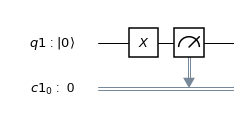

In [4]:
# Create a Quantum Register with 1 qubit (wire).
qr = QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place an X gate on the qubit wire
circ.x(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')


Now that the quantum circuit has been defined and drawn, let's execute it on a quantum simulator, running the circuit 100 times. Each run and measurement of the circuit is called a *shot*.

In [3]:
# Import Aer
from qiskit import BasicAer

# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)


/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'1': 100}


/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


The measurement for each run should be $\vert1\rangle$ as prescribed by the circuit. We'll now generate a visualization of the results.

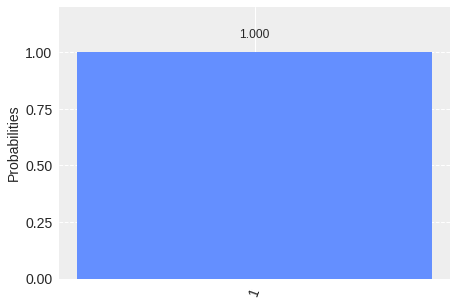

In [4]:
from qiskit.tools.visualization import plot_histogram

# Plot the results on a bar chart
plot_histogram(counts)

Now it's your turn to play! In the following cell, create a one-qubit circuit that uses two X gates so that the measurements result in the initial state of the qubit. To try your hand at this, write some code after each of the comments and run the cell.

In [0]:
# Create a Quantum Register with 1 qubit (wire).


# Create a Classical Register with 1 bit (double wire).


# Create a Quantum Circuit from the quantum and classical registers


# Place two X gates on the qubit wire


# Measure the qubit into the classical register


# Draw the circuit


# Use Aer's qasm_simulator


# Execute the circuit on the qasm simulator, running it 100 times.


# Grab the results from the job.


# Print the counts, which are contained in a Python dictionary


# Plot the results on a bar chart


The result of running the cell that you filled in should be a histogram containing one bar. This bar should indicate that the measurements of each of the 100 shots resulted in the $\vert0\rangle$ quantum state.